## 数据探索与可视化

### 实验目标
- 学习并掌握如何使用Python进行数据探索与可视化。
- 理解并应用数据探索的基本方法，包括数据清洗、格式化和描述性统计分析。
- 使用Matplotlib和Seaborn等可视化工具，绘制不同类型的图表，分析数据分布及特征之间的关系。
- 利用pandas_profiling生成数据的交互式报告，全面了解数据的分布、缺失值和异常值。

### 实验要求

1. 使用pandas读取数据集github_bot_processed_data.csv。探索pandas的显示选项，以便查看更多数据行和列。
2. 使用head()方法查看数据的前几行，并使用info()方法查看每列的数据类型，观察两者的区别。
使用describe()方法生成数据的描述性统计信息。
3. 对数据进行格式化处理，并展示不同格式（例如，日期、货币、百分比等）的效果。
4. 对public_repos、public_gists、followers、following等列进行对数变换，并查看其影响。
5. 使用Matplotlib绘制图表
    - 绘制条形图：展示label列的类别分布。
    - 绘制堆积柱状图：展示多个布尔特征（如site_admin、company等）的分布。
    - 绘制直方图：展示log_public_repos的对数变换后的数据分布。
    - 绘制散点图：展示public_repos与followers之间的关系。
    - 绘制散点矩阵：展示多个数值型特征之间的成对关系。
6. 使用Seaborn绘制图表
    - 绘制箱线图：展示不同label类别下log_followers的分布。
    - 绘制成对图：展示不同特征之间的成对关系，并根据label分类。
    - 绘制热图：展示log_public_repos、log_public_gists、log_followers和log_following等特征之间的相关性。
    - 绘制小提琴图：展示label与log_followers之间的分布差异。
7. 使用pandas_profiling.ProfileReport()生成交互式数据分析报告，分析数据的统计分布、缺失值、异常值等。

In [1]:
# 1
import pandas as pd
df = pd.read_csv('github_bot_processed_data.csv')

In [2]:
# 2
print(df.head())
print(df.info())
print(df.describe())

   label  type  site_admin  company   blog  location  hireable  \
0  Human  True       False    False  False     False     False   
1  Human  True       False    False   True     False      True   
2  Human  True       False     True   True      True      True   
3    Bot  True       False    False  False      True     False   
4  Human  True       False    False  False     False      True   

                                                 bio  public_repos  \
0                                                NaN            26   
1  I just press the buttons randomly, and the pro...            30   
2         Time is unimportant,\nonly life important.           103   
3                                                NaN            49   
4                                                NaN            11   

   public_gists  followers  following                 created_at  \
0             1          5          1  2011-09-26 17:27:03+00:00   
1             3          9          6  2015-06

In [3]:
# 3
data = df['created_at']
df['created_at'] = pd.to_datetime(df['created_at'])
print(df['created_at'])
data = df['updated_at']
df['updated_at'] = pd.to_datetime(df['updated_at'])
print(df['updated_at'])

0       2011-09-26 17:27:03+00:00
1       2015-06-29 10:12:46+00:00
2       2008-08-29 16:20:03+00:00
3       2014-05-20 18:43:09+00:00
4       2012-08-16 14:19:13+00:00
                   ...           
19763   2014-07-02 23:27:34+00:00
19764   2017-12-06 21:56:31+00:00
19765   2015-11-14 14:44:05+00:00
19766   2021-11-23 18:55:29+00:00
19767   2016-04-22 22:11:59+00:00
Name: created_at, Length: 19768, dtype: datetime64[ns, UTC]
0       2023-10-13 11:21:10+00:00
1       2023-10-07 06:26:14+00:00
2       2023-10-02 02:11:21+00:00
3       2023-10-12 12:54:59+00:00
4       2023-10-06 11:58:41+00:00
                   ...           
19763   2023-08-15 16:38:34+00:00
19764   2023-07-26 18:32:25+00:00
19765   2022-08-23 21:09:49+00:00
19766   2023-10-06 22:50:45+00:00
19767   2022-07-07 19:48:21+00:00
Name: updated_at, Length: 19768, dtype: datetime64[ns, UTC]


In [4]:
# 4
import numpy as np
df['public_repos'] = pd.to_numeric(df['public_repos'], errors='coerce')
df['public_gists'] = pd.to_numeric(df['public_gists'], errors='coerce')
df['followers'] = pd.to_numeric(df['followers'], errors='coerce')
df['following'] = pd.to_numeric(df['following'], errors='coerce')

df['log_public_repos'] = np.log(df['public_repos']+1)
df['log_public_gists'] = np.log(df['public_gists']+1)
df['log_followers'] = np.log(df['followers']+1)
df['log_following'] = np.log(df['following']+1)
df.head()

,label,type,site_admin,company,blog,location,hireable,bio,public_repos,public_gists,followers,following,created_at,updated_at,text_bot_count,log_public_repos,log_public_gists,log_followers,log_following
0,Human,True,False,False,False,False,False,NaN,26,1,5,1,2011-09-26 17:27:03+00:00,2023-10-13 11:21:10+00:00,0,3.295837,0.693147,1.791759,0.693147
1,Human,True,False,False,True,False,True,"I just press the buttons randomly, and the pro...",30,3,9,6,2015-06-29 10:12:46+00:00,2023-10-07 06:26:14+00:00,0,3.433987,1.386294,2.302585,1.945910
2,Human,True,False,True,True,True,True,"Time is unimportant,\nonly life important.",103,49,1212,221,2008-08-29 16:20:03+00:00,2023-10-02 02:11:21+00:00,0,4.644391,3.912023,7.100852,5.402677
3,Bot,True,False,False,False,True,False,NaN,49,0,84,2,2014-05-20 18:43:09+00:00,2023-10-12 12:54:59+00:00,0,3.912023,0.000000,4.442651,1.098612
4,Human,True,False,False,False,False,True,NaN,11,1,6,2,2012-08-16 14:19:13+00:00,2023-10-06 11:58:41+00:00,0,2.484907,0.693147,1.945910,1.098612


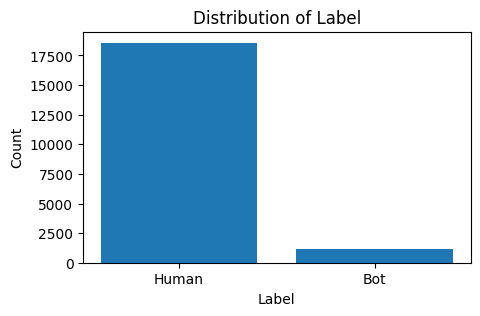

In [5]:
# 5
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 3))
plt.bar(df['label'].value_counts().index, df['label'].value_counts().values)
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of Label')
plt.show()

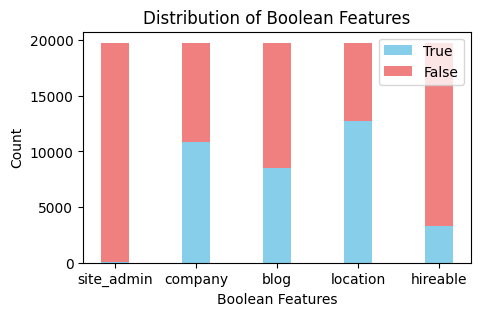

In [6]:
# 5
import matplotlib.pyplot as plt
bool_features = ['site_admin', 'company', 'blog', 'location', 'hireable']  
counts = df[bool_features].apply(lambda x: x.value_counts(), axis=0).fillna(0)  
counts = counts.T  

plt.figure(figsize=(5, 3))
bar_width = 0.35  
index = range(len(bool_features))  
plt.bar(index, counts[True], bar_width, label='True', color='skyblue')  
plt.bar(index, counts[False], bar_width, bottom=counts[True], label='False', color='lightcoral')  
 
plt.title('Distribution of Boolean Features')  
plt.xlabel('Boolean Features')  
plt.ylabel('Count')  
plt.xticks(index, bool_features)  
plt.legend()  
plt.show()

Text(0.5, 1.0, 'Distribution of log_public_repos')

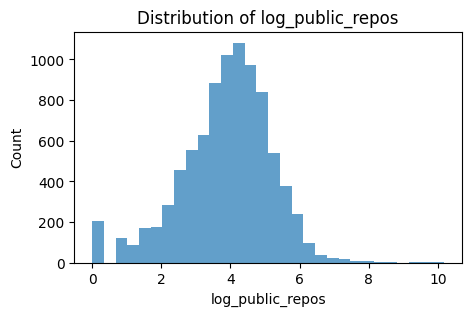

In [7]:
# 5
df = df.replace(float('-inf'), pd.NA)
df = df.dropna()
plt.figure(figsize=(5, 3))
plt.hist(df['log_public_repos'], bins=30, alpha=0.7, label='log_public_repos')
plt.xlabel('log_public_repos')
plt.ylabel('Count')
plt.title('Distribution of log_public_repos')

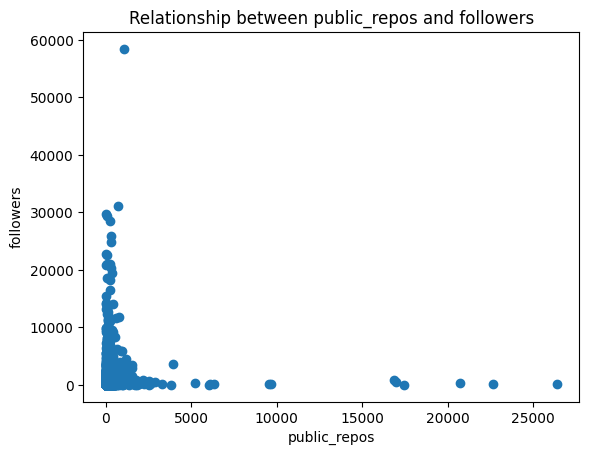

In [8]:
# 5
plt.scatter(df['public_repos'], df['followers'])
plt.xlabel('public_repos')
plt.ylabel('followers')
plt.title('Relationship between public_repos and followers')
plt.show()

<Figure size 500x300 with 0 Axes>

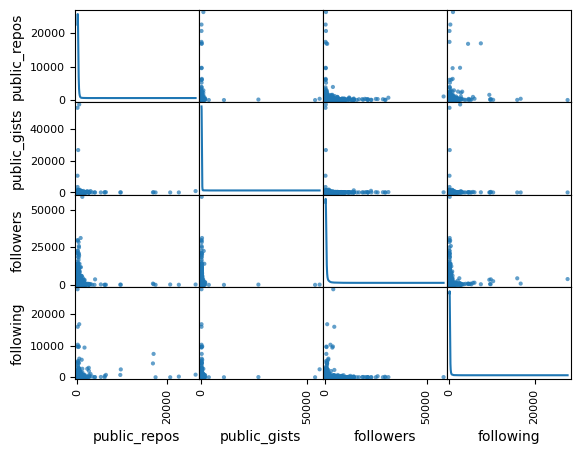

In [9]:
# 5
plt.figure(figsize=(5, 3))
pd.plotting.scatter_matrix(df[['public_repos', 'public_gists', 'followers', 'following']], alpha=0.7, diagonal='kde')
plt.show()


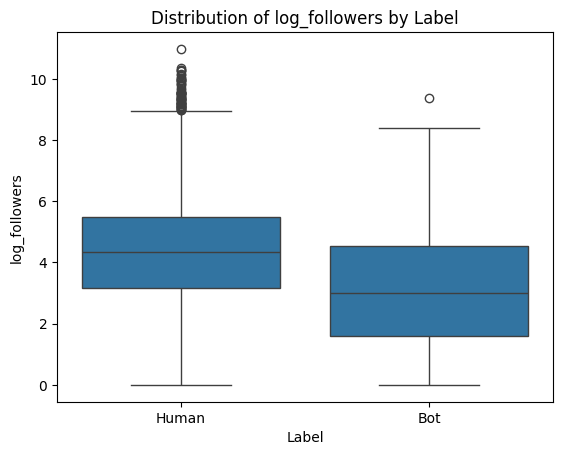

In [10]:
# 6
import seaborn as sns
sns.boxplot(x='label', y='log_followers', data=df)
plt.xlabel('Label')
plt.ylabel('log_followers')
plt.title('Distribution of log_followers by Label')
plt.show()

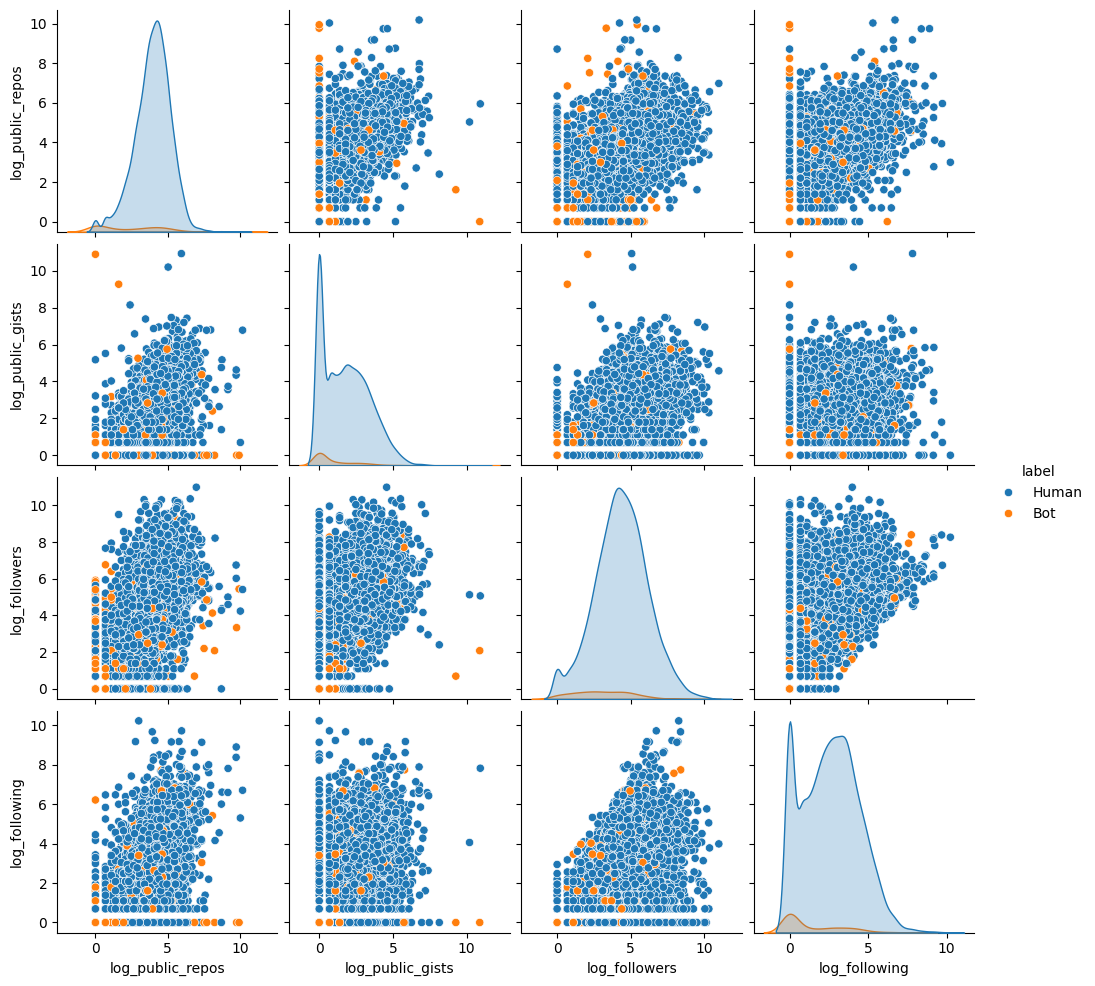

In [11]:
# 6
sns.pairplot(df[['log_public_repos', 'log_public_gists', 'log_followers', 'log_following', 'label']], hue='label')
plt.show()

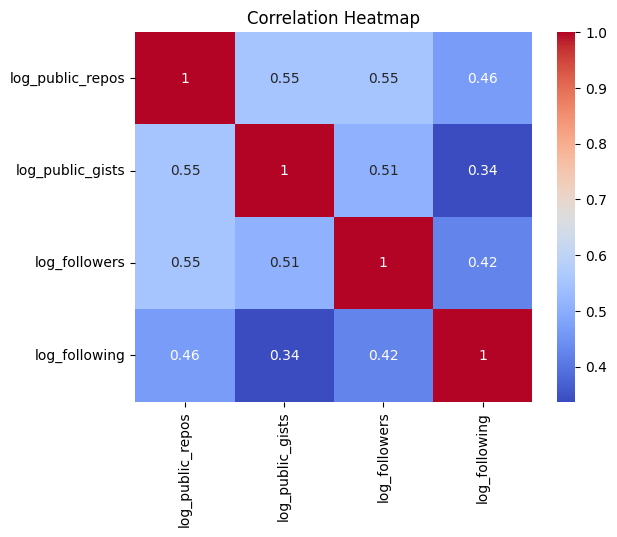

In [12]:
# 6
sns.heatmap(df[['log_public_repos', 'log_public_gists', 'log_followers', 'log_following']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

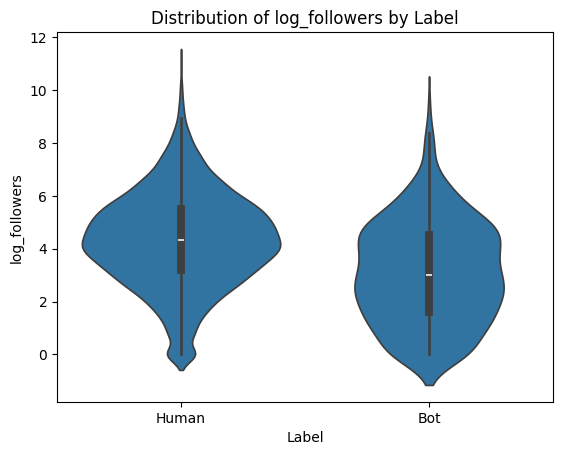

In [13]:
# 6
sns.violinplot(x='label', y='log_followers', data=df)
plt.xlabel('Label')
plt.ylabel('log_followers')
plt.title('Distribution of log_followers by Label')
plt.show()

In [14]:
# 7
from ydata_profiling import ProfileReport
profile = ProfileReport(df,correlations={"auto": {"calculate": False}})
profile.to_file("report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]